# Data analysis for MSc5_research_project 

This jupyter notebook deals with analysing the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master degree program.

Just to repeat briefly, the aim of the project is to use machine learning in order to predict whether a particpant can be classified either as control or patient with psychotic disorder based on different brain modalities. Before starting with our first modality being **cortical thickness (CT)**, the learning problem and the task type should be defined to know which model suits the best for the purpose of the project aim.

## 1. Learning problem and task type

Considering the task type, our purpose is to classify the samples in two categories being control and patient. Hence, the task type is **classification**. For that, I want to use the given information regarding the labels for each sample, consequently the learning problem is **supervised**.

More specifically, with the data at hand the task type is **binary classification**. **Binary classification** refers to those classification task that have two class labels (in this data set control/patient). 
Commonly used algorithms for binary classification include **Logistic Regression, k-Nearest Neighbors, Decision Trees, Support Vector Machine and Naive Bayes** (for further information click [here](https://machinelearningmastery.com/types-of-classification-in-machine-learning/)).
In this project, I will focus on two algorithms being **Logistic Regression** and **Support Vector Machine**. 

## 2. Logistic Regression

### 2.1 Data preperation

First of all, I use CT data as my input data for the classification.


In [1]:
#import relevant modules 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#read data

df = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [3]:
df

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


The data contains variables such as SubjectID, Age and Sex which are not relevant for the classification. Hence, we adjust the dataframe accordingly.

In [4]:
#adjust dataframe

df_adj = df.drop(['Subject ID','Age', 'Sex'], axis=1)

In [5]:
df_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


As the dataframe shows, the Group variable contains information of whether the samples belong to control or patient. In this case, 1 indicates control and 2 patient. In order to perform a **Logistic Regression**, the labels of the outputs requires to be 0 and 1 since the probability of an instance belonging to a default class is computed.

In [6]:
#label group 1 as 0 and 2 as 1

df_adj['Group'] = df_adj['Group'].replace([1,2],[0, 1])

In [7]:
df_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,0,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,0,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,1,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,1,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,1,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,1,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,1,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [8]:
#get shape of df_adj

df_adj.shape

(108, 309)

To get an idea of how many of the participants belong to control and patient group and to plot that we can simply execute the following commands.

In [9]:
df_adj['Group'].value_counts()

0    80
1    28
Name: Group, dtype: int64

<AxesSubplot:xlabel='Group', ylabel='count'>

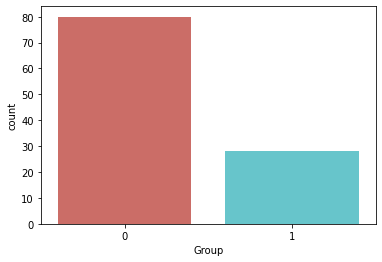

In [10]:
sns.countplot(x='Group', data = df_adj, palette='hls')

The plot shows a clear unequal distribution of the participants in the Group variable. 

Because the LogisticRegression function from sklearn requires the inputs to be numpy arrays, in the following step the dataframe is converted to a numpy array.

In [11]:
#dataframe as numpy array 

df_adj.to_numpy()

array([[0.   , 2.18 , 2.382, ..., 2.776, 3.282, 3.347],
       [0.   , 2.394, 1.973, ..., 2.654, 3.124, 3.214],
       [0.   , 2.551, 2.567, ..., 2.495, 2.669, 2.886],
       ...,
       [1.   , 2.273, 2.559, ..., 2.294, 2.571, 2.875],
       [1.   , 1.94 , 2.438, ..., 2.51 , 2.759, 2.838],
       [1.   , 2.108, 2.269, ..., 2.551, 2.855, 2.985]])

### 2.2 Building the model

In the next steps, the **logistic regression** model is built. Firstly, the input and output should be defined. Our input contains the **CT** for all of the 308 brain regions, meaning that there are n=308 features in total. The output is within the Group variable containing label information.

In [12]:
#define input

X = df_adj.iloc[:,1:308].values

In [13]:
X

array([[2.18 , 2.382, 2.346, ..., 3.62 , 2.776, 3.282],
       [2.394, 1.973, 2.534, ..., 3.588, 2.654, 3.124],
       [2.551, 2.567, 1.954, ..., 3.657, 2.495, 2.669],
       ...,
       [2.273, 2.559, 2.578, ..., 3.48 , 2.294, 2.571],
       [1.94 , 2.438, 2.272, ..., 3.187, 2.51 , 2.759],
       [2.108, 2.269, 2.145, ..., 3.192, 2.551, 2.855]])

In [14]:
X.shape

(108, 307)

In [15]:
#output

y = df_adj.iloc[:,[0]].values

In [16]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [17]:
y.shape

(108, 1)

In [18]:
y = y.ravel()

In [19]:
y.shape

(108,)

In [20]:
#split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print(xtrain)
print(xtest)

[[ 3.05831735  1.57472533  0.97751966 ...  0.69306214 -0.43012507
   1.3016343 ]
 [-0.42752542  0.49195636  0.98566147 ...  1.07033991  2.01003971
   1.46144259]
 [ 0.39552079 -1.33548374 -0.27631893 ...  0.35171559  1.52940119
  -0.4653888 ]
 ...
 [ 0.48354712  1.22378835  0.41980575 ...  1.0613571  -0.78341492
   0.96375391]
 [ 0.5055537  -0.06012741  0.48086931 ... -0.0884418   0.73244502
   0.21493792]
 [-1.56746643 -0.52233709 -2.69850711 ... -0.38038293  0.2887787
  -0.21882744]]
[[ 0.47034317 -0.3468686  -1.8761844  ... -1.04511043 -1.42837429
  -0.92654987]
 [ 1.42102756 -0.2569945  -1.82733354 ...  0.29332736 -0.27402025
  -1.33748547]
 [ 0.80484323  1.75447353 -0.92766365 ...  0.61670831  0.21483431
  -0.15490412]
 ...
 [-0.19425564  0.60750878  0.87981796 ...  1.43863487 -0.17953575
  -0.29644861]
 [-0.64318994 -1.69070043 -1.14342159 ... -1.47179362 -1.2969176
  -1.80777844]
 [-0.26027539  0.48767665  1.35204288 ... -0.09293321  0.55169207
   1.42034903]]


In [22]:
classifier = LogisticRegression(random_state = 0, solver ='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [23]:
y_pred=classifier.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

### Model evaluation

In the next step, the model is evaluated. To evaluate the model, a look at the **confusion matrix** is helpful. The **confusion matrix** provides information on the quality of the logistic regression model since it shows the predicted values from the model compared to the actual values from the test dataset.

In [25]:
#confusion matrix

cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[18  1]
 [ 6  2]]


Text(0.5, 257.44, 'Predicted label')

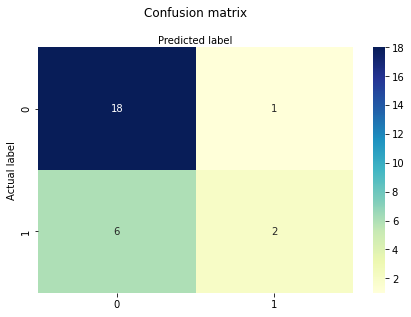

In [48]:
# plot the confusion matrix visually more appealing

class_names=[0,1]

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

As the plot shows, there are in total 27 predictions (N=108 participants * 25% test size). The upper left square in the **confusion matrix** contains all the **true positive** cases meaning that when a participant predicted as control belongs to the control group. Accordingly, the bottom right square carries information on **true negative** cases meaning a participant predicted as patient was a patient. On the contrary, the upper right square contains **false positives** cases (participant predicted as patient but was control) and the bottom left square contains information on **false negative** cases (participant predicted as control but was patient). At first sight, the model seems to be good. However, there are other measures indicating the qualtiy of the model such as **accuracy, precision and recall**.

In [28]:
#compute accuracy, precision, recall

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.7407407407407407
Precision: 0.6666666666666666
Recall: 0.25


The accuracy measure indicates the percentage of correct predictions, in this case 74.07%. The precision measure shows the correct positive predictions relative to total positive predictions, here 0.667. The recall measure indicates the correct positive predictions relative to total actual positives, here 0.25.

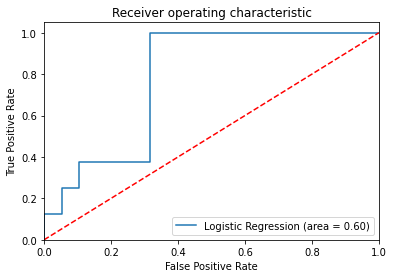

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVM

Following the scikit-learn algorhitm cheat-sheet, for the data at hand the performance of a **linear SVM** is recommended. The data contains more than 50 participants (samples), the aim is to predict a category (control/patient) and the data is labeled. 

SVMs are a set of supervised learning methods used that can be used for classifcation, regression and outliers detection (for further information click here). The basic idea is to find an optimal separating line (or hyperplane) as output that separates the data into two classes. The SVM algorithm looks for the data points that are the clostest to the line from both classes. These points are called support vectors. Then, the distance between the support vectors and the hyperplane which is called the margin is computed. To find the best and optimal hyperplane, the margin should be maximized.


Support vector classification(SVC) or Linear Support vector classification (LinearSVC) are methods of SVMs making it feasible to perfom a binary or mulit-class classification on a dataset. For the purpose of this project, LinearSVC is going to be performed.

In [ ]:
import pandas as pd

#load CT data

CT = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [ ]:
#adjust data frame 

CT_adj = CT.drop(['Subject ID','Age', 'Sex'], axis=1)


In [ ]:
#label group 1 as control and 2 as patient

CT_adj['Group'] = CT_adj['Group'].replace([1,2],['control', 'patient'])

In [ ]:
CT_adj

In [ ]:
CT_adj.shape

In [ ]:
#print the names of the 308 features

print("Features: ", CT_adj.columns[2:308])

In [ ]:
#print the names of the labels

print("Labels: ", CT_adj['Group'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
CT_data = CT_adj[0:308]
CT_target = CT_adj['Group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CT_data, CT_target, test_size=0.3,random_state=109)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred))
